# MNIST classification using multi-layer perceptron

#### 1. Import packages

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader
from tqdm.notebook import trange, tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
from MLP import *

#### 2. Prepare dataset

Choose device

In [2]:
device = get_default_device()

Constants

In [3]:
batchSize = 100
datasetDir = "./datasets"

Get data

In [4]:
trainData = datasets.MNIST(root=datasetDir, train=True, transform=transforms.ToTensor(), download=True)
testData = datasets.MNIST(root=datasetDir, train=False, transform=transforms.ToTensor(), download=True)
trainSet, valSet = random_split(trainData, [50000, 10000]) # Create validation set

Data loaders

In [5]:
trainLoader = DataLoader(trainSet, batch_size=batchSize, shuffle=True, num_workers=4, pin_memory=True)
valLoader = DataLoader(valSet, batch_size=batchSize, shuffle=False, num_workers=4, pin_memory=True)
testLoader = DataLoader(testData, batch_size=batchSize, shuffle=False, num_workers=4, pin_memory=True)

trainLoader = DeviceDataLoader(trainLoader, device)
valLoader = DeviceDataLoader(valLoader, device)
testLoader = DeviceDataLoader(testLoader, device)

#### 3. Train model

Initialize model

In [6]:
model = MNIST_MLP(28*28, 32, 10)
to_device(model, device)

MNIST_MLP(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

Constants

In [7]:
numEpochs = 20
learningRate = 0.001

Initial accuracy

In [8]:
epochAccuracy = [evaluate(model, valLoader)]

Train model

In [9]:
epochAccuracy += fit(numEpochs, learningRate, model, trainLoader, valLoader)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [0], val_loss: 2.2339, val_acc: 0.2027


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [1], val_loss: 2.1324, val_acc: 0.2536


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [2], val_loss: 2.0130, val_acc: 0.4311


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [3], val_loss: 1.8777, val_acc: 0.5865


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [4], val_loss: 1.7289, val_acc: 0.6799


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [5], val_loss: 1.5726, val_acc: 0.7317


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [6], val_loss: 1.4187, val_acc: 0.7644


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [7], val_loss: 1.2761, val_acc: 0.7843


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [8], val_loss: 1.1505, val_acc: 0.8017


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [9], val_loss: 1.0436, val_acc: 0.8148


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [10], val_loss: 0.9544, val_acc: 0.8225


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [11], val_loss: 0.8807, val_acc: 0.8300


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [12], val_loss: 0.8196, val_acc: 0.8369


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [13], val_loss: 0.7688, val_acc: 0.8413


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [14], val_loss: 0.7261, val_acc: 0.8451


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [15], val_loss: 0.6899, val_acc: 0.8488


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [16], val_loss: 0.6589, val_acc: 0.8550


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [17], val_loss: 0.6320, val_acc: 0.8584


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [18], val_loss: 0.6087, val_acc: 0.8616


  0%|          | 0/500 [00:00<?, ?it/s]

Epoch [19], val_loss: 0.5882, val_acc: 0.8641


Plot accuracy vs num epoch

[0.08619999140501022, 0.20270000398159027, 0.25360000133514404, 0.4310999810695648, 0.5864999890327454, 0.6798999905586243, 0.73170006275177, 0.7644000053405762, 0.7843000292778015, 0.8016999959945679, 0.8148000240325928, 0.8224999308586121, 0.830000102519989, 0.8368999361991882, 0.8412999510765076, 0.8451000452041626, 0.8488000631332397, 0.8550000190734863, 0.8583999872207642, 0.8616000413894653, 0.8641000390052795]


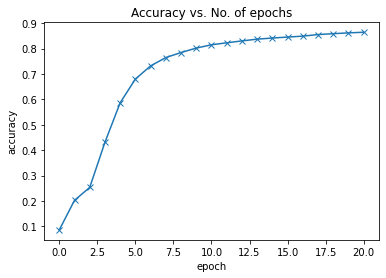

In [10]:
accuracies = [result['val_acc'] for result in epochAccuracy]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');
print(f"{accuracies}")

#### 4. Test model

In [11]:
# Overall test accuracy
result = evaluate(model, testLoader)
print(f"Test accuracy={result['val_acc']}")

Test accuracy=0.8705000281333923


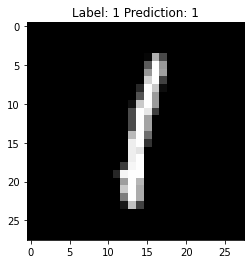

enter n to see next image, or anything else to exit:  


In [12]:
keyboard = 'n'
while keyboard == 'n':
    clear_output()
    img, label = testData[int(torch.randint(0, len(testData), (1,1)))]
    displayImage(img, label, predict_image(img, model, device))
    keyboard = input("enter n to see next image, or anything else to exit: ")